In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings

In [ ]:
data = pd.read_csv("/content/META.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2017,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,1/4/2017,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,1/5/2017,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,1/6/2017,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,1/9/2017,123.550003,125.430000,123.040001,124.900002,124.900002,22880400
...,...,...,...,...,...,...,...
1610,5/26/2023,252.929993,262.309998,252.710007,262.040009,262.040009,25727200
1611,5/30/2023,265.250000,268.649994,261.290009,262.519989,262.519989,23816500
1612,5/31/2023,260.000000,265.000000,258.450012,264.720001,264.720001,25473700
1613,6/1/2023,265.899994,274.000000,265.890015,272.609985,272.609985,25609500


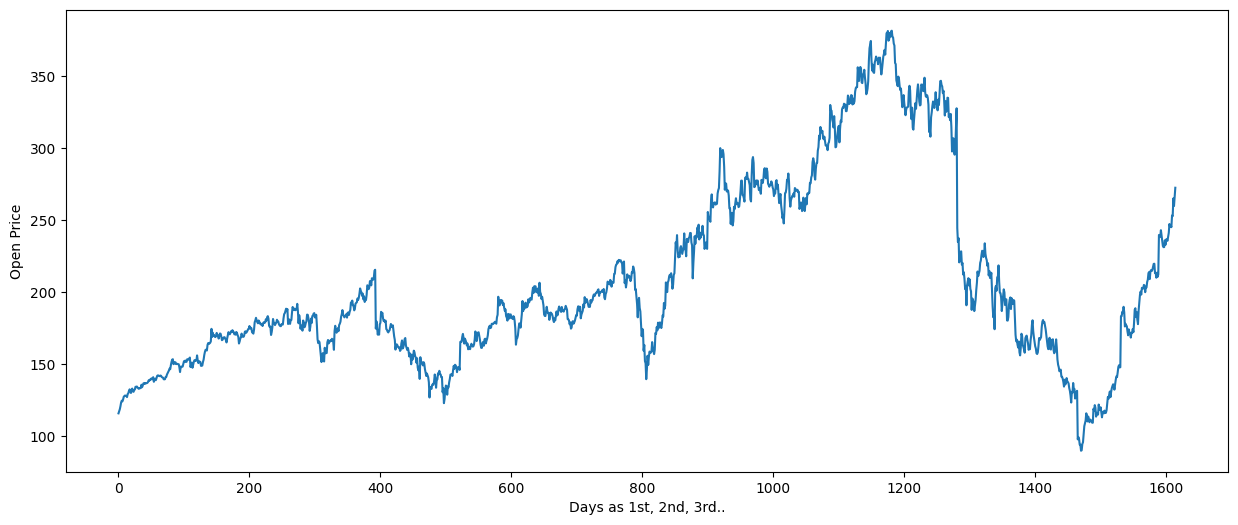

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(data.Open)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [ ]:
length_data = len(data)

length_train = round(length_data * 0.7)  
length_test = round(length_data * 0.2)  
length_validation = length_data - length_train - length_test
print("Data length :", length_data)
print("Train data length :", length_train)
print("Test data length :", length_test)
print("Validation data lenth :", length_validation)

Data length : 1615
Train data length : 1130
Test data length : 323
Validation data lenth : 162


In [ ]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2017-01-03,116.029999
1,2017-01-04,117.550003
2,2017-01-05,118.860001
3,2017-01-06,120.980003
4,2017-01-09,123.550003
...,...,...
1125,2021-06-23,339.350006
1126,2021-06-24,341.850006
1127,2021-06-25,342.589996
1128,2021-06-28,342.459991


In [ ]:
test_data = data[length_train:length_train+length_test].iloc[:,:2]
test_data['Date'] = pd.to_datetime(test_data['Date'])  # converting to date time object
test_data

,Date,Open
1130,2021-06-30,352.170013
1131,2021-07-01,346.820007
1132,2021-07-02,355.100006
1133,2021-07-06,356.500000
1134,2021-07-07,355.260010
...,...,...
1448,2022-10-04,140.490005
1449,2022-10-05,138.240005
1450,2022-10-06,137.720001
1451,2022-10-07,136.759995


In [ ]:
val_data = data[length_train+length_test:length_train+length_test+length_validation].iloc[:,:2]
val_data['Date'] = pd.to_datetime(val_data['Date'])  # converting to date time object
val_data

,Date,Open
1453,2022-10-11,131.619995
1454,2022-10-12,128.320007
1455,2022-10-13,123.529999
1456,2022-10-14,131.000000
1457,2022-10-17,130.300003
...,...,...
1610,2023-05-26,252.929993
1611,2023-05-30,265.250000
1612,2023-05-31,260.000000
1613,2023-06-01,265.899994


In [ ]:
dataset_train = train_data.Open.values
dataset_train.shape

(1130,)

In [ ]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1130, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1130, 1)

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1080, 50)
Shape of y_train before reshape : (1080,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1080, 50, 1)
Shape of y_train after reshape : (1080, 1)


# Train model

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
34/34 [==============================] - 6s 57ms/step - loss: 0.3356 - accuracy: 0.0000e+00
Epoch 2/50
34/34 [==============================] - 3s 81ms/step - loss: 0.1967 - accuracy: 9.2593e-04
Epoch 3/50
34/34 [==============================] - 2s 72ms/step - loss: 0.1297 - accuracy: 9.2593e-04
Epoch 4/50
34/34 [==============================] - 2s 57ms/step - loss: 0.1063 - accuracy: 9.2593e-04
Epoch 5/50
34/34 [==============================] - 2s 56ms/step - loss: 0.0850 - accuracy: 0.0000e+00
Epoch 6/50
34/34 [==============================] - 2s 57ms/step - loss: 0.0667 - accuracy: 9.2593e-04
Epoch 7/50
34/34 [==============================] - 2s 55ms/step - loss: 0.0491 - accuracy: 9.2593e-04
Epoch 8/50
34/34 [==============================] - 2s 73ms/step - loss: 0.0446 - accuracy: 9.2593e-04
Epoch 9/50
34/34 [==============================] - 3s 78ms/step - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 10/50
34/34 [==============================] - 2s 56ms/step - loss:

In [ ]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

34/34 [==============================] - 1s 16ms/step


(1080, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1080, 1)

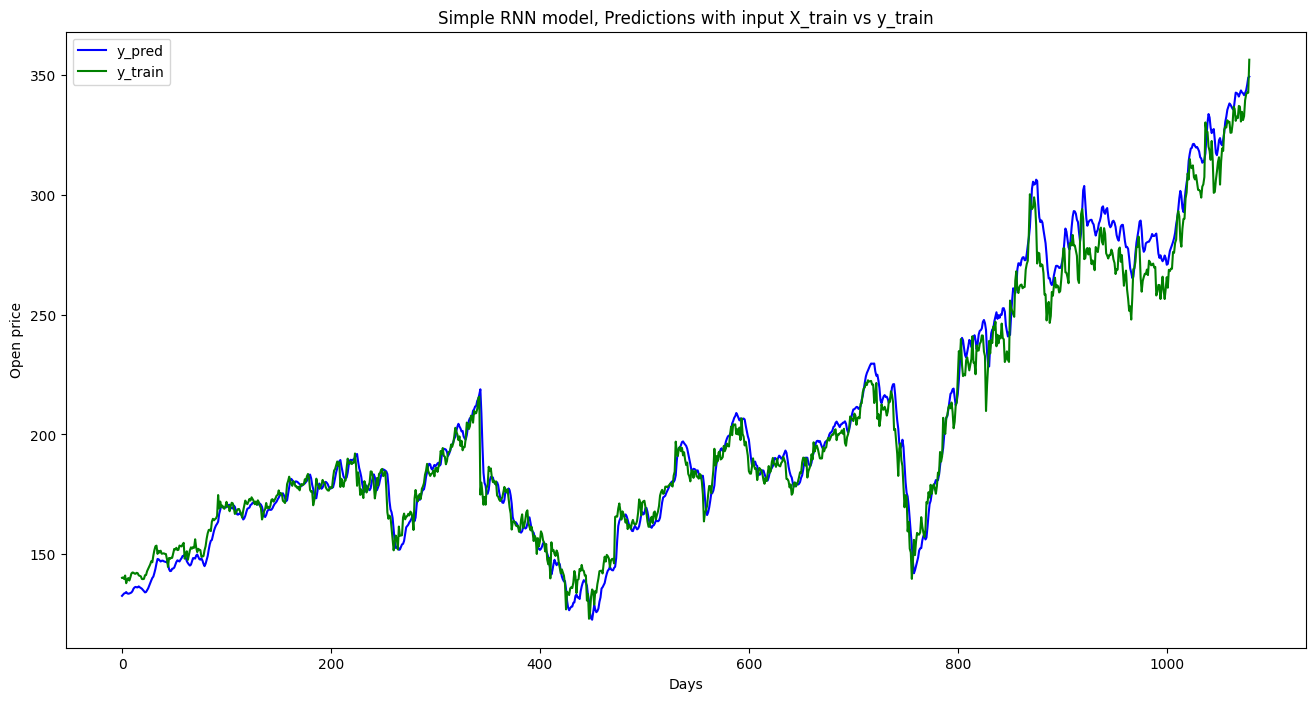

In [ ]:
# visualisation
plt.figure(figsize = (16,8))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

# Test data

In [ ]:
test_data = test_data.Open.values  # getting "open" column and converting to array
test_data = np.reshape(test_data, (-1,1))  # converting 1D to 2D array
scaled_dataset_test =  scaler.fit_transform(test_data)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_test.shape)

Shape of scaled validation dataset : (323, 1)


In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_test):
    X_test.append(scaled_dataset_test[i-time_step:i,0])
    y_test.append(scaled_dataset_test[i,0])

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (273, 50)
Shape of y_test before reshape : (273,)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (273, 50, 1)
Shape of y_test after reshape : (273, 1)


In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

9/9 [==============================] - 0s 26ms/step
Shape of y_pred_of_test : (273, 1)


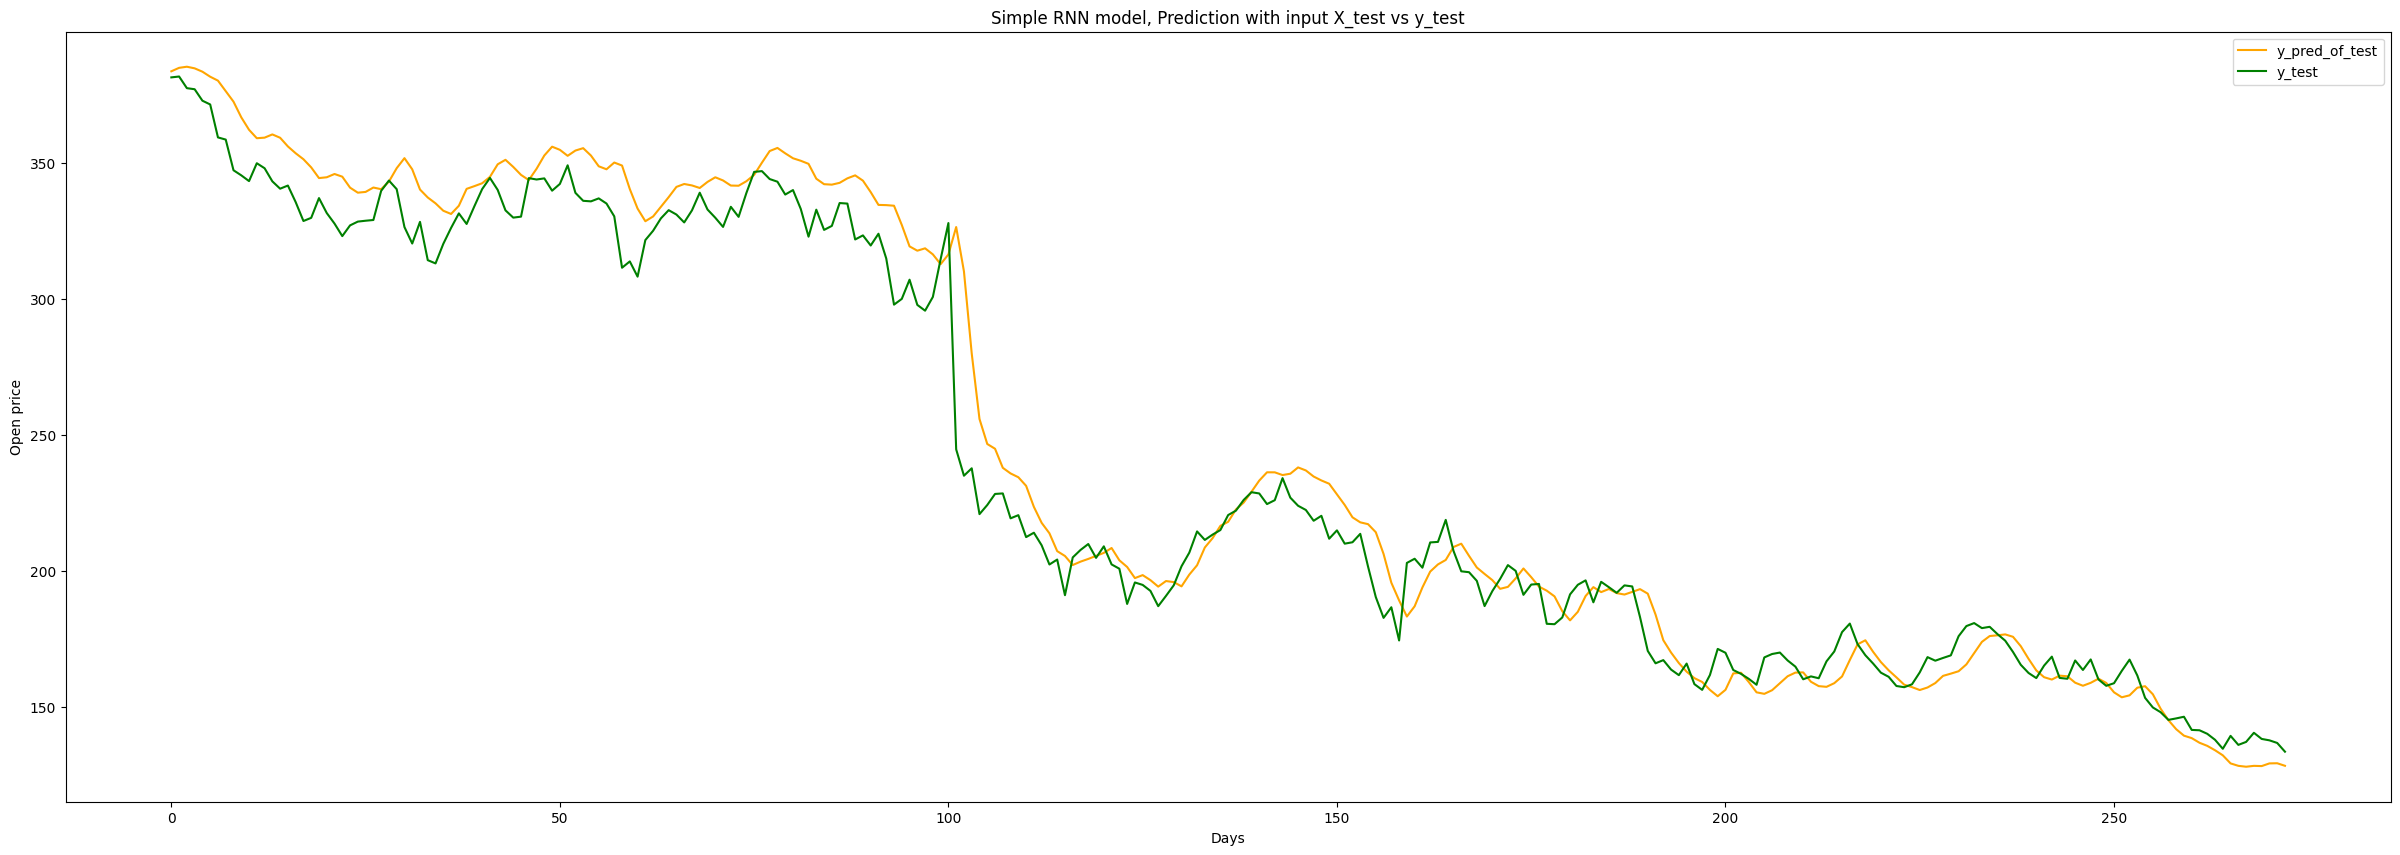

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

# Val data

In [ ]:
dataset_val = val_data.Open.values  # getting "open" column and converting to array
dataset_val = np.reshape(dataset_val, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_val)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (162, 1)


In [ ]:
# Creating X_test and y_test
X_val = []
y_val= []

for i in range(time_step, length_validation):
    X_val.append(scaled_dataset_validation[i-time_step:i,0])
    y_val.append(scaled_dataset_validation[i,0])

In [ ]:
X_val, y_val = np.array(X_val), np.array(y_val)

In [ ]:
print("Shape of X_test before reshape :",X_val.shape)
print("Shape of y_test before reshape :",y_val.shape)

Shape of X_test before reshape : (112, 50)
Shape of y_test before reshape : (112,)


In [ ]:
X_val = np.reshape(X_val, (X_val.shape[0],X_val.shape[1],1))  # reshape to 3D array
y_val = np.reshape(y_val, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_val.shape)
print("Shape of y_test after reshape :",y_val.shape)

Shape of X_test after reshape : (112, 50, 1)
Shape of y_test after reshape : (112, 1)


In [ ]:
# predictions with X_test data
y_pred_of_val = regressor.predict(X_val)
# scaling back from 0-1 to original
y_pred_of_val = scaler.inverse_transform(y_pred_of_val) 
print("Shape of y_pred_of_test :",y_pred_of_val.shape)

4/4 [==============================] - 0s 15ms/step
Shape of y_pred_of_test : (112, 1)


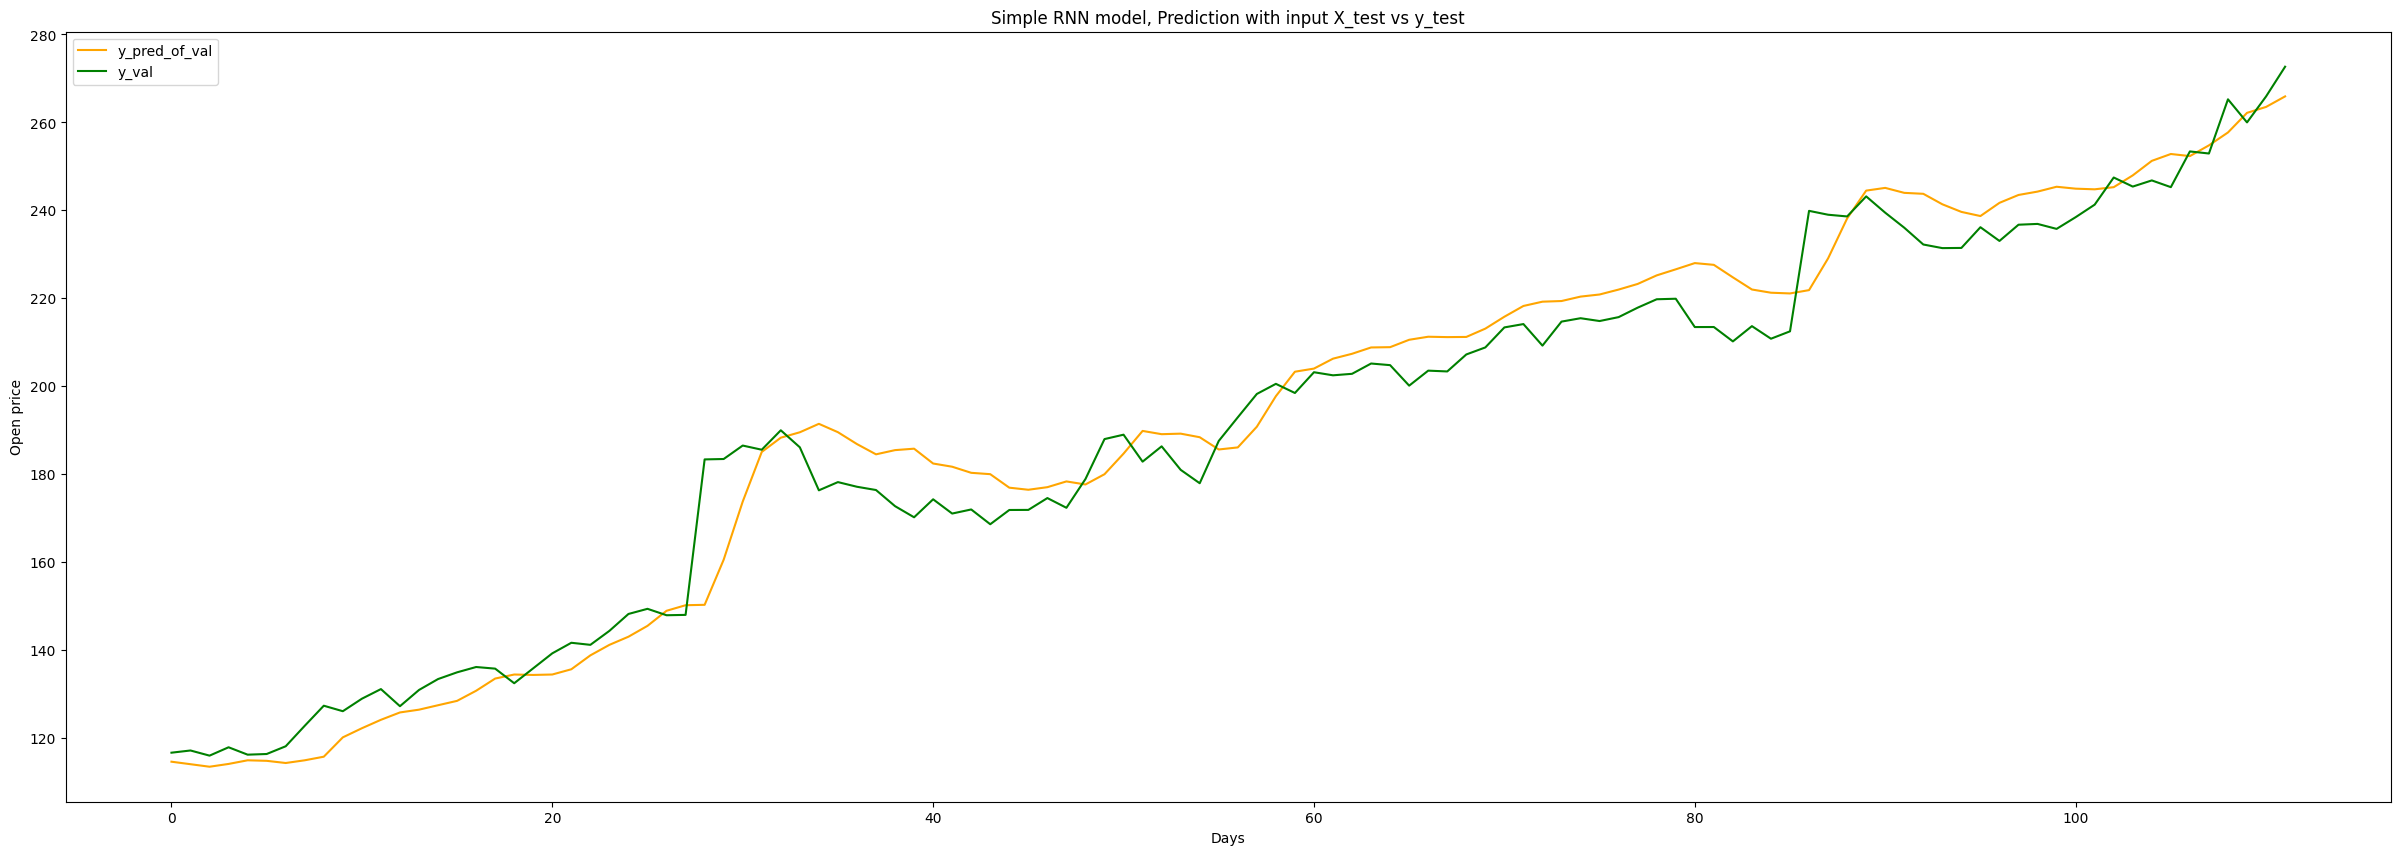

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_val, label = "y_pred_of_val", c = "orange")
plt.plot(scaler.inverse_transform(y_val), label = "y_val", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

# Ve hinh

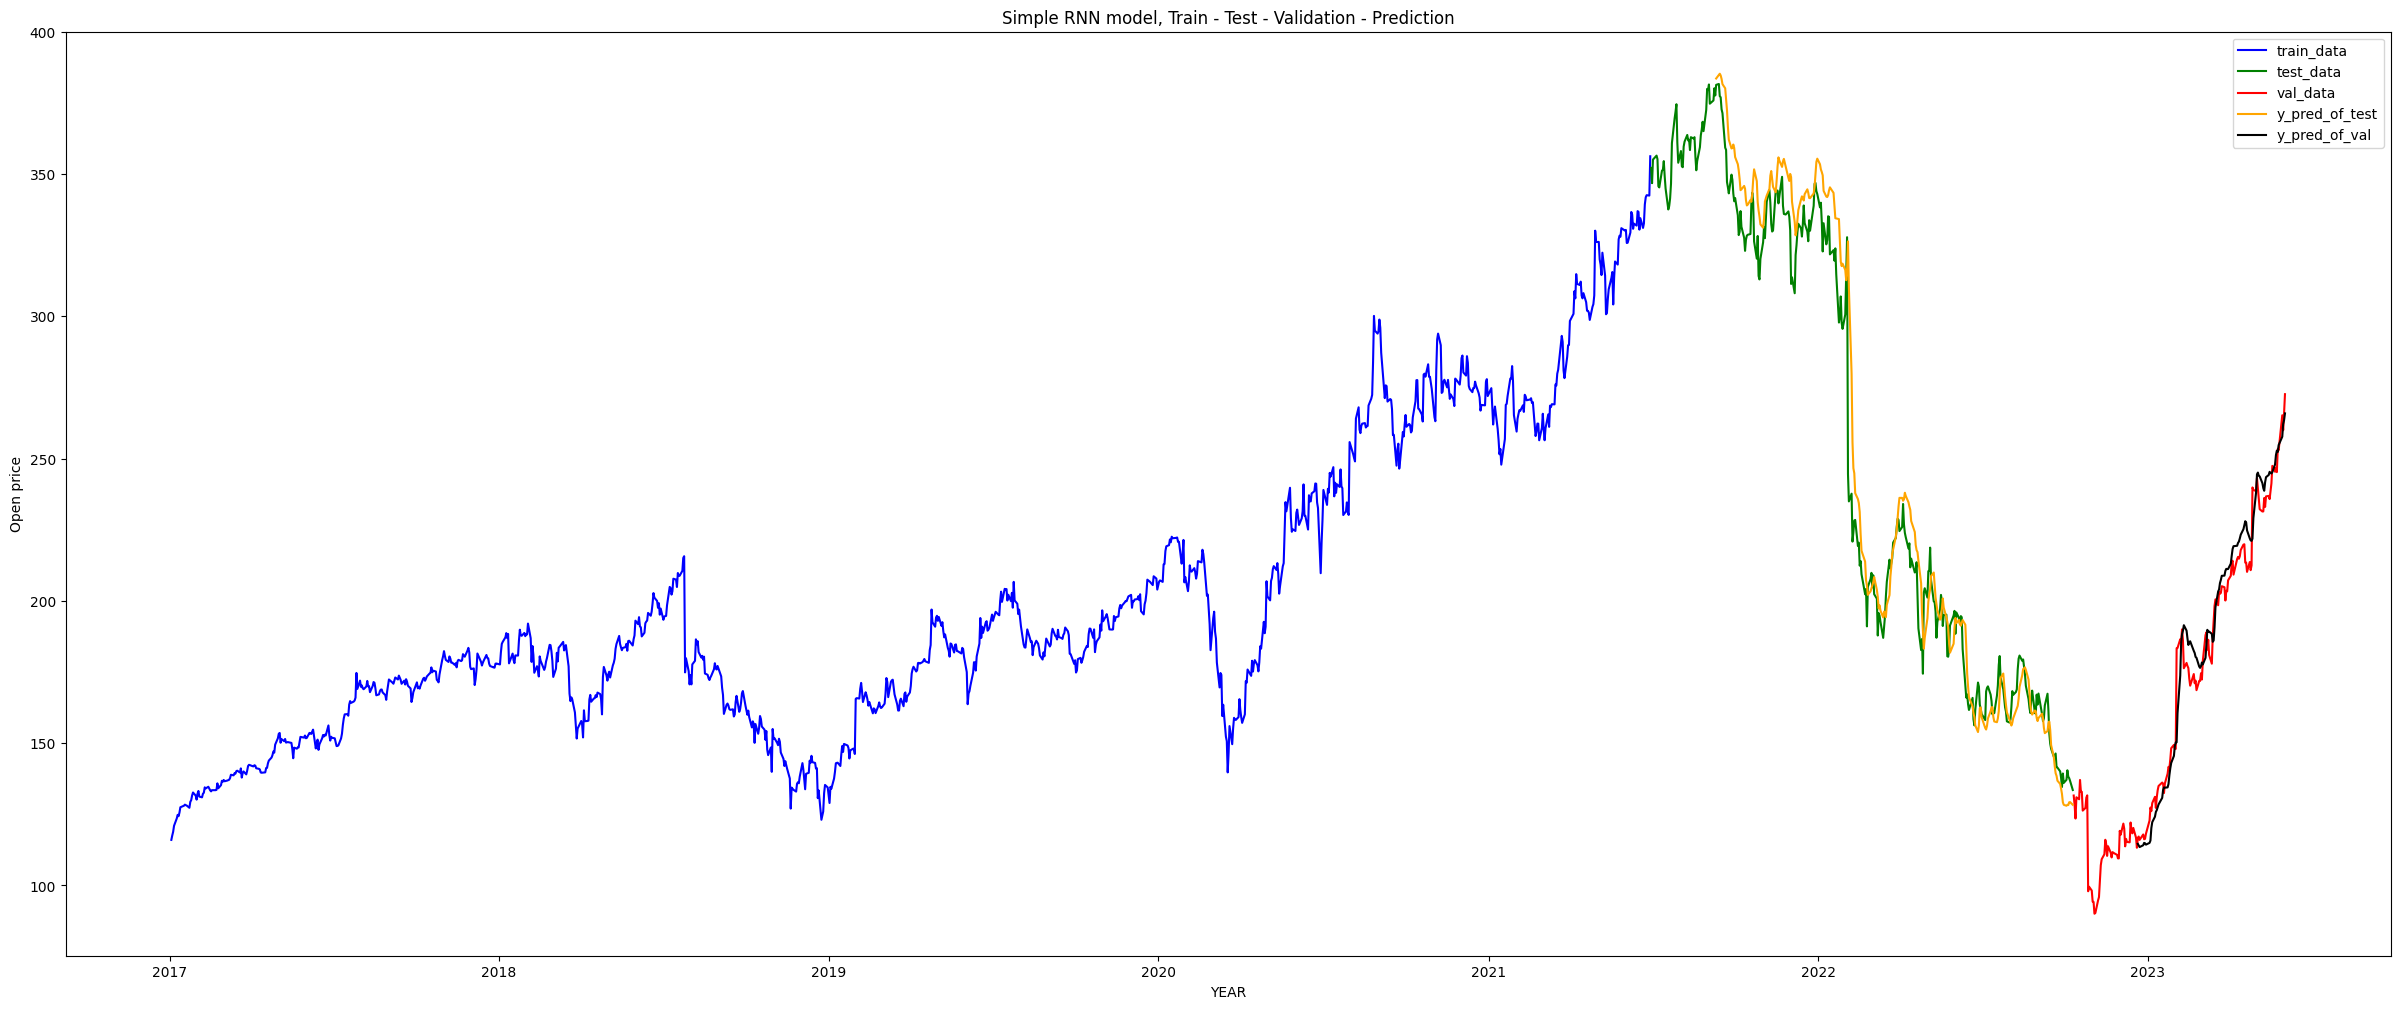

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "test_data", color = "g")
plt.plot(val_data.Date, val_data.Open, label = "val_data", color = "r")

# plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.plot(val_data.Date.iloc[time_step:], y_pred_of_val, label = "y_pred_of_val", color = "black")
plt.xlabel("YEAR")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train - Test - Validation - Prediction")
plt.legend()
plt.show()

# Chi so


In [ ]:
# Dự báo dữ liệu test, val

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)
val_predict=regressor.predict(X_val)

4/4 [==============================] - 0s 15ms/step


In [ ]:
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)
val_predict = val_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)
print("Val data prediction:", val_predict.shape)

Train data prediction: (1080, 1)
Test data prediction: (273, 1)
Val data prediction: (112, 1)


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
val_predict = scaler.inverse_transform(val_predict)

original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
original_yval = scaler.inverse_transform(y_val.reshape(-1,1)) 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((original_yval - y_val)**2))
test_rmse = np.sqrt(np.mean((original_ytest - y_test)**2))
print('---------------------------------')
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MSE
val_mse = mean_squared_error(original_yval, y_val)
test_mse = mean_squared_error(original_ytest, y_test)

print('\n---------------------------------')
print('Validation MSE:', val_mse)
print('Testing MSE:', test_mse)

#MAPE

val_mea = mean_absolute_error(original_yval, y_val)
test_mea = mean_absolute_error(original_ytest, y_test)
print('\n---------------------------------')
print('Validation MAPE:', val_mea)
print('Testing MAPE:', test_mea)

---------------------------------
Validation RMSE: 194.13620261795012
Testing RMSE: 176.52145320824232

---------------------------------
Validation MSE: 37688.865166917785
Testing MSE: 31159.823442749686

---------------------------------
Validation MEA: 189.65838585753121
Testing MEA: 167.554693421686
